<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Visión por Computadora</center></span>
## <span style="color:red"><center>Single Shot Detector</center></span>

##   <span style="color:blue">Profesores</span>

### Coordinador


- Campo Elías Pardo Turriago, cepardot@unal.edu.co 

### Conferencistas


- Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
- Daniel  Montenegro, Msc, dextronomo@gmail.com 
- Oleg Jarma, Estadístico, ojarmam@unal.edu.co 

## <span style="color:blue">Asesora Medios y Marketing digital</span>

- Maria del Pilar Montenegro, pmontenegro88@gmail.com 



## <span style="color:blue">Asistentes</span>



- Nayibe Yesenia Arias, naariasc@unal.edu.co
- Venus Celeste Puertas, vpuertasg@unal.edu.co 

## <span style="color:blue">Introducción</span>

La creación de YOLO constituyó un antes y un después en lo que se refiere a la detección de objetos. Pero por supuesto, había espacio para mejorar. al observar los problemas pasados con detección, junto con los desarrollos y nuevas ideas obtenidos por el equipo de DARKNET, en 2016, obtuvimos su priomer "contrincante": Single Shot Detector

## <span style="color:blue">Los problemas originales de detección</span>

volvamos un poco a los plenos inicios de detección de imágenes. La idea inicial en este caso era el entrenar un buen modelo clasificador y después "moverlo" a través de la imagen.

<figure>
<center>
<img src="../Imagenes/slidingwindow.gif" width="432" height="360" align="center"/> 
</center>
</figure>

por supuesto, ya conocemos los problemas principales de este acercamiento: Los tamaños de los objetos serán variables, y no podríamos contar el número exacto  de objetos dentro de cada ventana.

Una de las formas que se planteó arreglar esto fue la capacidad de generar múltiples cajas de diferentes tamaños a medida que encontramos clases. Esto se probó de descartó ya ayudaba al arreglo de estos asuntos. Pero no significia que esta idea sea completamente nula de mérito. Solo le faltaba una forma más eficiente de encontrar clases y definir las cajas. Y gracias al desarrollo de YOLO, se obtuvo justamente esto

## <span style="color:blue">Single Shot Detector y su diferencia a YOLO</span>

En su primera versión, YOLO procesaba videos a 21 FPS, junto con una precisión menor a la de la familia RCNN, así que había muchas cosas que mejorar.

Single Shot Detector(SSD) construye casi en su totalidad sobre YOLO, con unas diferencias pequeñas como el backbone del modelo, usando VGG16 en sus inicios.

<figure>
<center>
<img src="../Imagenes/ssd.png" width="700" height="300" align="center"/> 
</center>
</figure>


El cambio más importante es en la generación de cajas ancla, junto con los datos que predice con ella.

Al igual que YOLO, se crea una malla y se hace detección en cada celda. Si hay un objeto en una de estas, se crean un número específico de cajas ancla. Aquí es donde vemos las diferencias, ya que este modelo no predice una única clase dentro de cada celda. En su lugar, se predice una probabilidad de confianza de cada una de las clases definidas. A razón de esto, cada celda genera cajas ancla de cada una de las clases definidas. Así que, si estamos detectando 4 clases, SSD va a crear 4 cajas ancla cuando encuentre en un posible objeto, y cada caja va a tener una probabilidad de contener a cada una de las clases. Todo esto es simultaneo, razón del nombre "Single Shot"

<figure>
<center>
<img src="../Imagenes/SSD_boxes.jpg" width="480" height="360" align="center"/> 
</center>
</figure>

SSD no solo duplicó la velocidad de YOLOv1, consiguiendo procesar videos en 46 FPS, pero incluso superó la precisión de Faster R-CNN. 

Vamos Entonces a hacer una pequeña aplicación de este algoritmo. Aquí, al igual que YOLO, la forma más sencilla de utilziar este modelo es apartir de Torch Hub. LA diferencia de esta versión al original es el uso de una ResNet34 en lugar de VGG.

In [3]:
#Para usar este modelo, es necesario instalar el paquete scikit-image

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"

ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Using cache found in /home/thejarmanitor/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /home/thejarmanitor/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


In [5]:
ssd_model.to(device)
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

In [32]:
uris = [ 
        'http://images.cocodataset.org/val2017/000000397133.jpg',
        'http://images.cocodataset.org/val2017/000000037777.jpg',
        'http://images.cocodataset.org/val2017/000000252219.jpg',
        'https://ultralytics.com/images/zidane.jpg'
]



In [33]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

In [34]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

El modelo inicialmente solo hace la creación de todas las cajas, así que es necesario hacer una limpieza de detecciones no deseadas y una organización de los datos.

en este caso sólo nos quedaremos con las cajas que tengan una confianza de al menos el 40%

In [18]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

Este modelo solo predice "IDs" de las clases. Para obtener el nombre como tal, hayu

In [10]:
classes_to_labels = utils.get_coco_object_dictionary()

Ahora, hay que escribir las cajas y las probabilidades en las respectivas imágenes

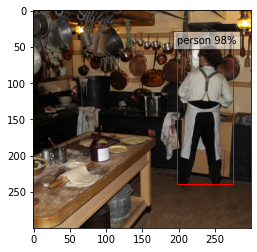

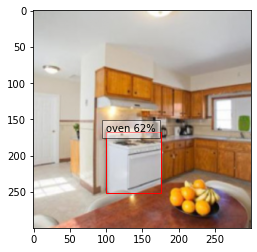

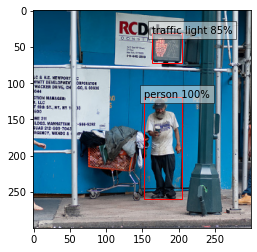

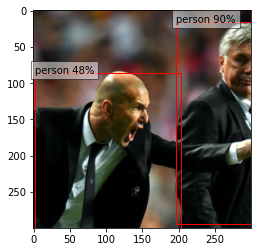

In [19]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # tomamos la imagen sin normalizar
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # agregamos las detecciones
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()